# **Uber Data Analysis**

---

## <u>Importing Libraries and resources</u>

In [1]:
%pylab inline
import pandas as pd
import seaborn

Populating the interactive namespace from numpy and matplotlib


### Load CSV file into memory

In [2]:
data = pd.read_csv(r'D:\AK\Projects\Data Analysis\Uber Data Analysis\uber-raw-data-apr14.csv')

 *When you want to use this path as an string parameter into a Python function, you get a Unicode error, just because the \u is a Unicode escape. Any character not numeric after this produces an error*

In [3]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


### Convert Date/Time and add some useful columns

In [4]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [5]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [6]:
def get_dom(dt): # dom = day of month
    return dt.day

def get_weekday(dt):
    return dt.weekday()

def get_hour(dt):
    return dt.hour

data['DoM'] = data['Date/Time'].map(get_dom)
data['Weekday'] = data['Date/Time'].map(get_weekday)
data['Hour'] = data['Date/Time'].map(get_hour)

data.sample(n=5)

,Date/Time,Lat,Lon,Base,DoM,Weekday,Hour
214557,2014-04-30 18:42:00,40.7388,-73.9916,B02598,30,2,18
387058,2014-04-08 12:02:00,40.7403,-73.9942,B02682,8,1,12
385880,2014-04-08 07:57:00,40.7759,-73.9898,B02682,8,1,7
125999,2014-04-18 04:38:00,40.7203,-73.9846,B02598,18,4,4
498823,2014-04-24 17:13:00,40.7539,-73.9821,B02682,24,3,17


---

## <u>Analysis</u>

### Analyze the DoM

In [9]:
DoM = data['DoM'].unique()
DoM

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

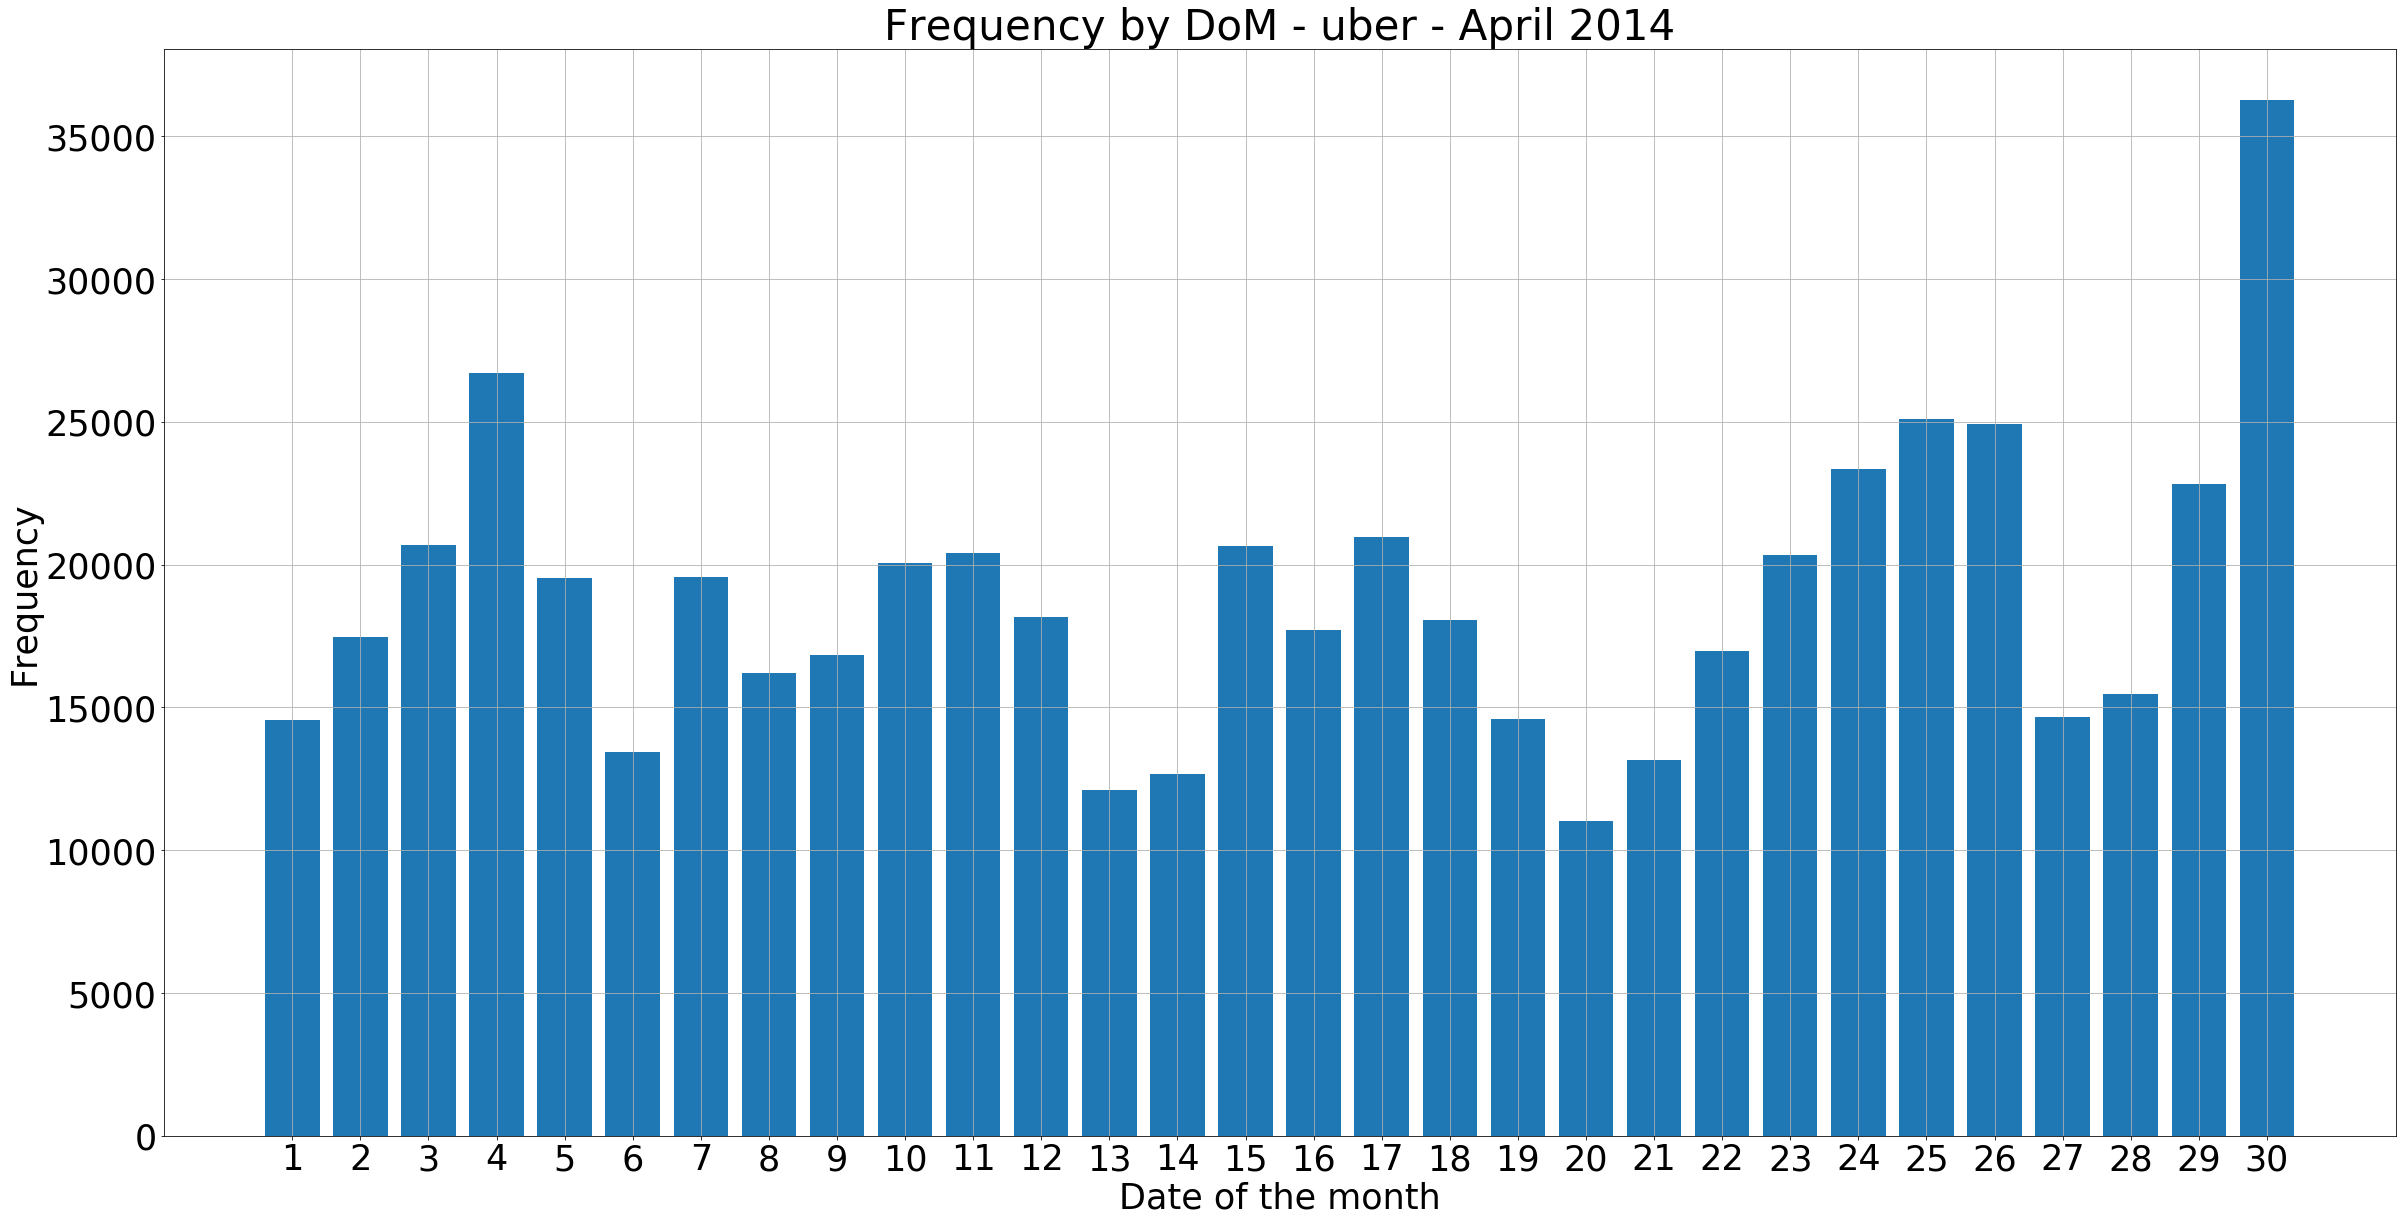

In [12]:
hist(data.DoM, bins=30, rwidth=0.8, range=(0.5, 30.5))
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by DoM - uber - April 2014')
xticks(DoM)
yticks()
#plt.rcParams["figure.figsize"] = (40,20)
plt.rcParams.update({'font.size': 35})
plt.grid(True)
plt.show()


#### The frequency of Uber Rides hailed for each day of the month is plotted in the graph above

In [13]:
#for k, rows in data.groupby('DoM'):
 #   print (k, len(rows))

# This cell returns the no of records for each 'DoM'(Day of month)    
    
def count_rows(rows):
    return len(rows)

by_date = data.groupby('DoM').apply(count_rows)
by_date

DoM
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

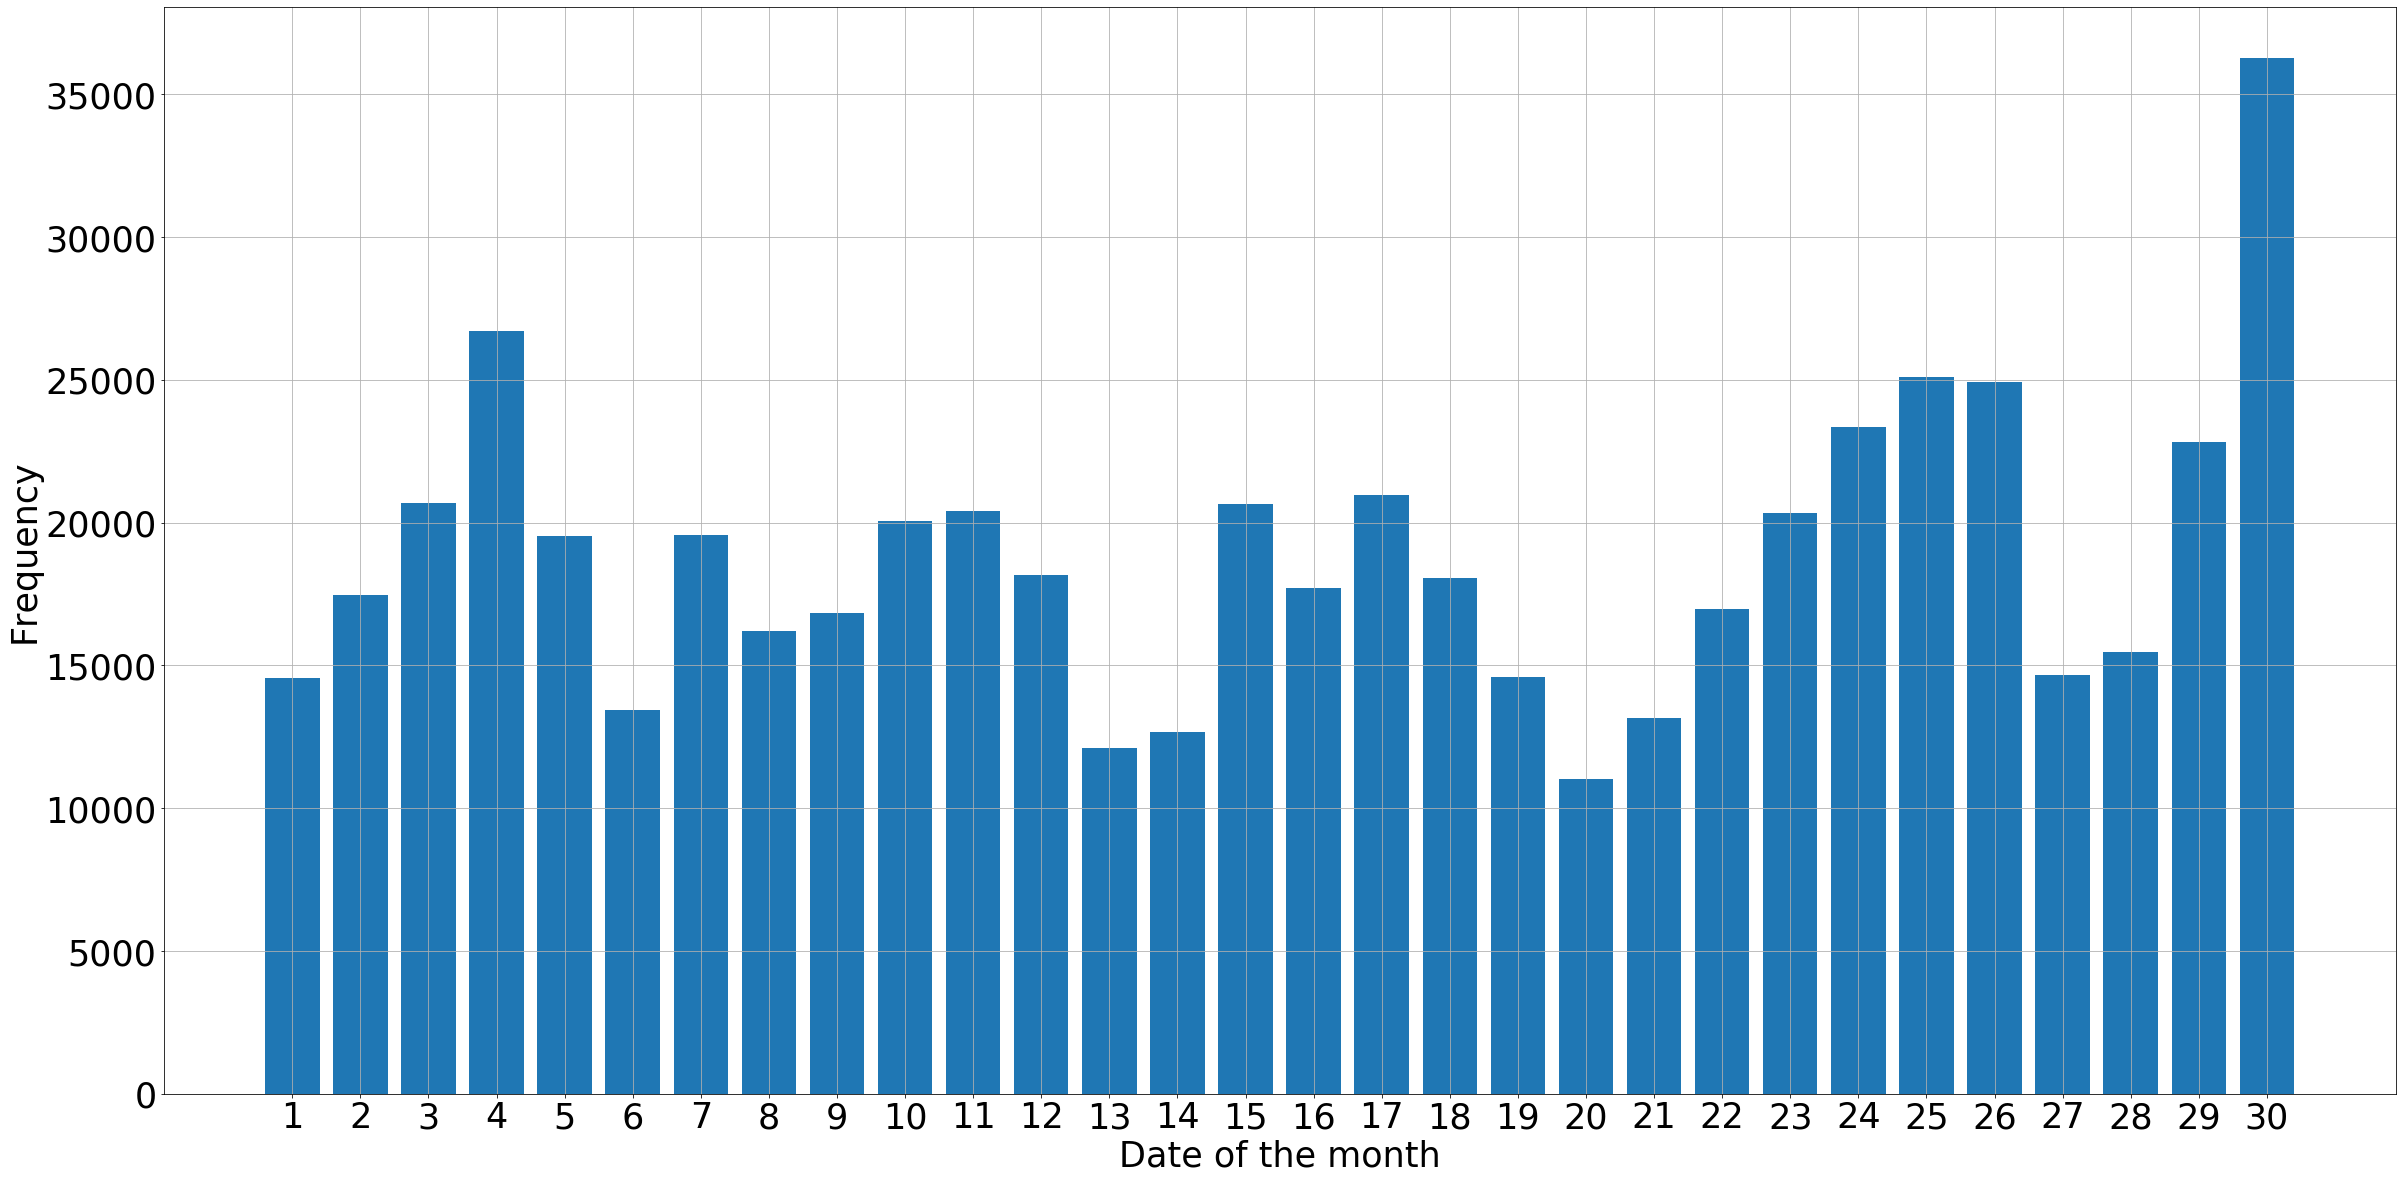

In [29]:
bar(range(1, 31), by_date)
xlabel('Date of the month')
ylabel('Frequency')
xticks(DoM)
yticks()
plt.grid(True)
plt.show()

In [19]:
by_date_sorted = by_date.sort_values()
by_date_sorted

DoM
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

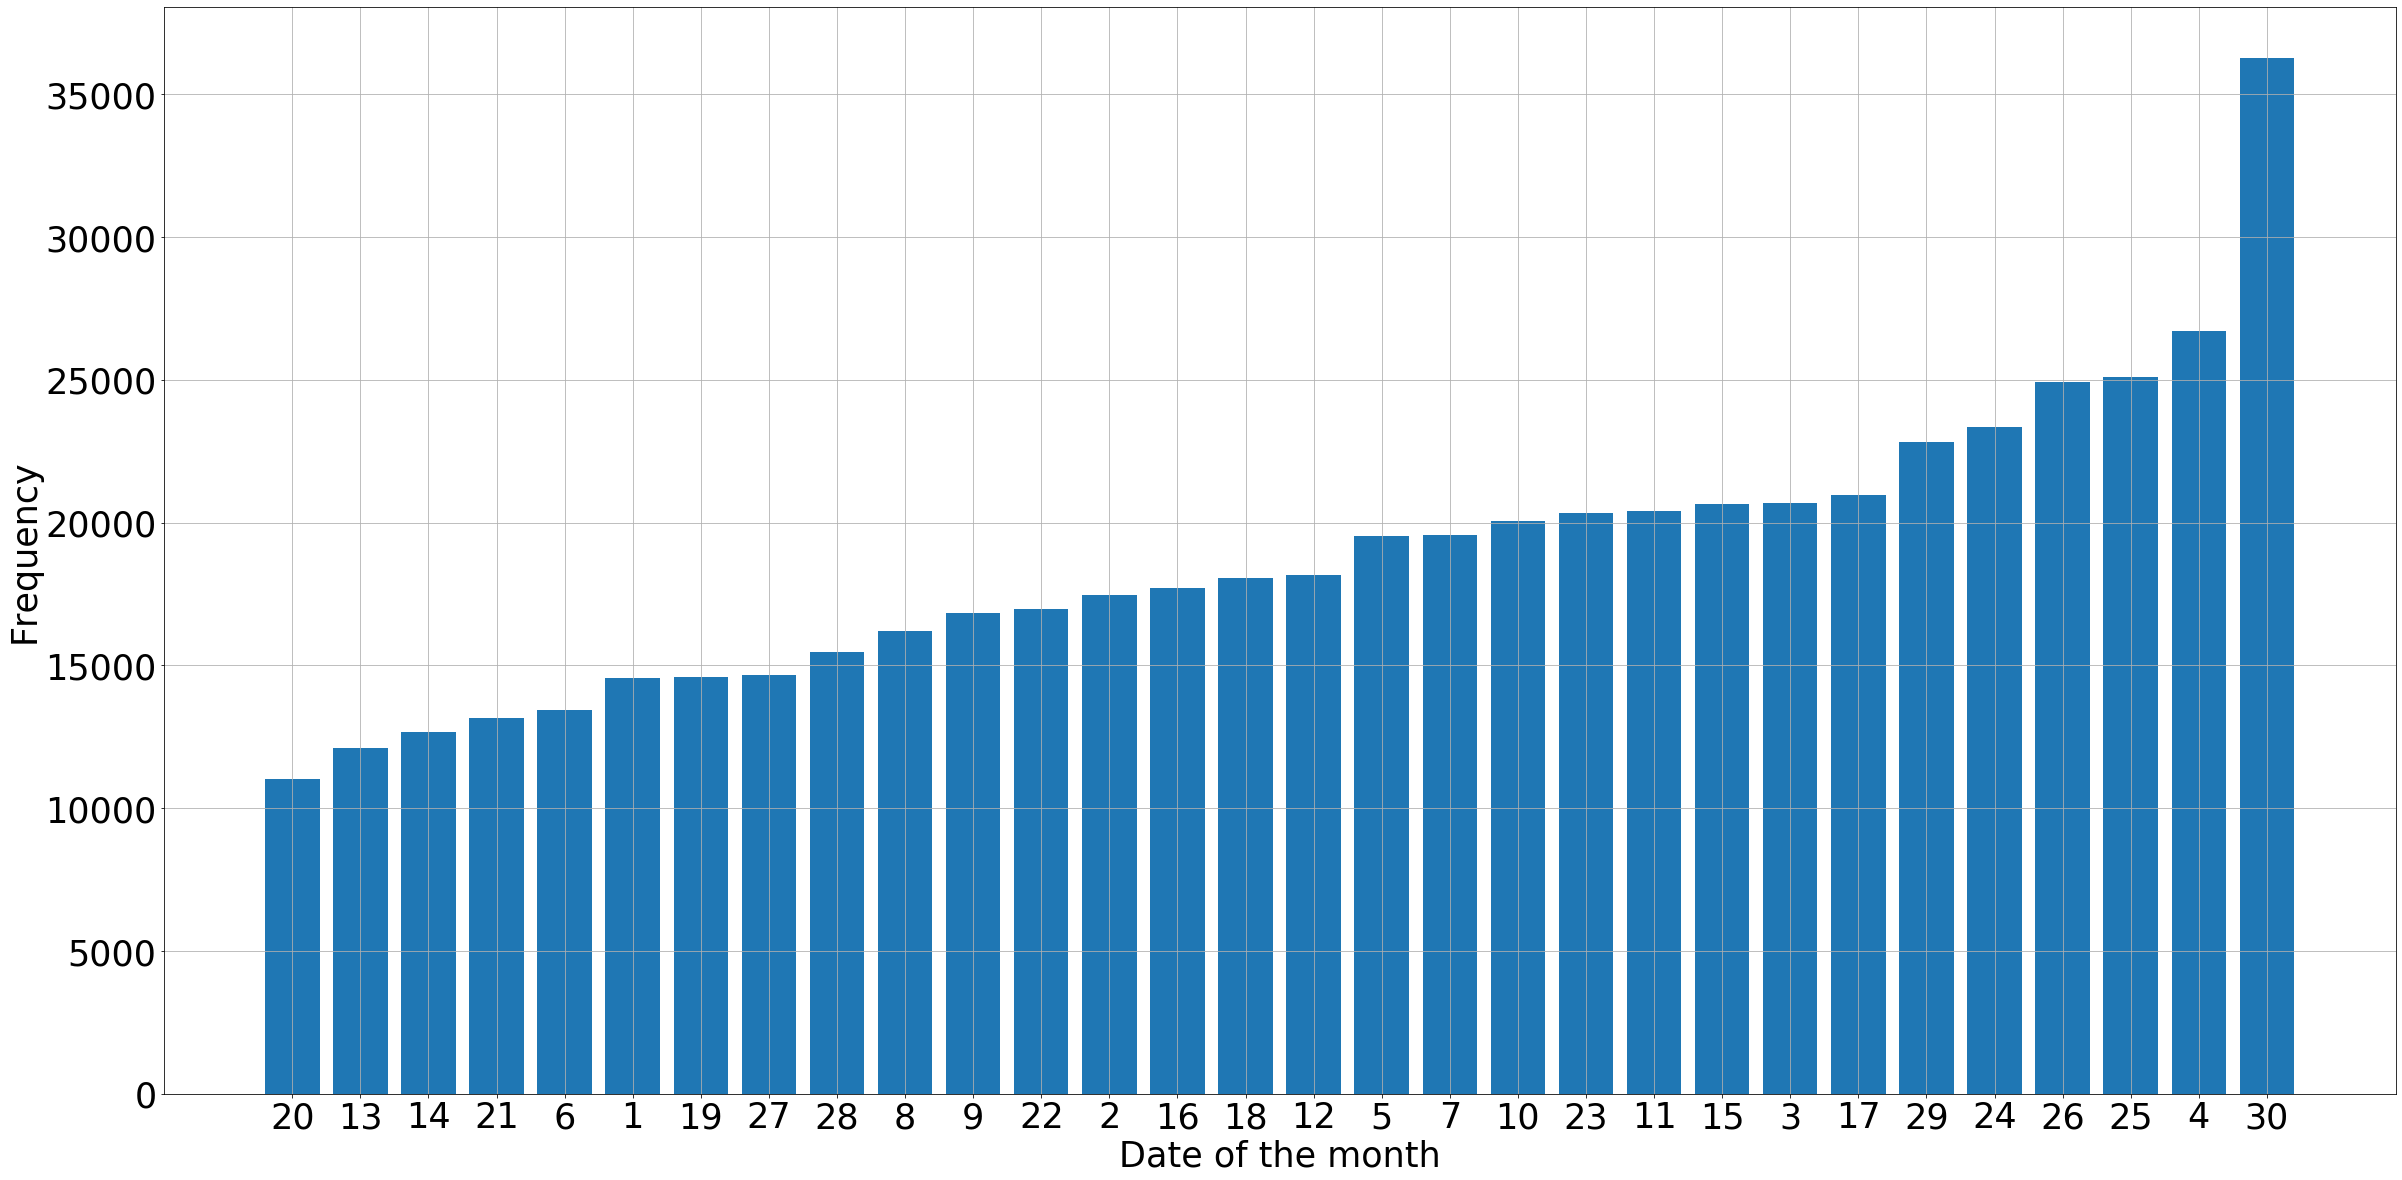

In [20]:
bar(range(1, 31), by_date_sorted)
xlabel('Date of the month')
ylabel('Frequency')
xticks(range(1,31), by_date_sorted.index)
yticks()
plt.grid(True)
plt.show()

#### The graph is sorted according to the frequency of Uber bookings for each day of the month.
<p>We can see that on 20th of the month, least number of bookings were made, and most booking were made on the last day of the month i.e 30th</p>

#### Analyze the Hour

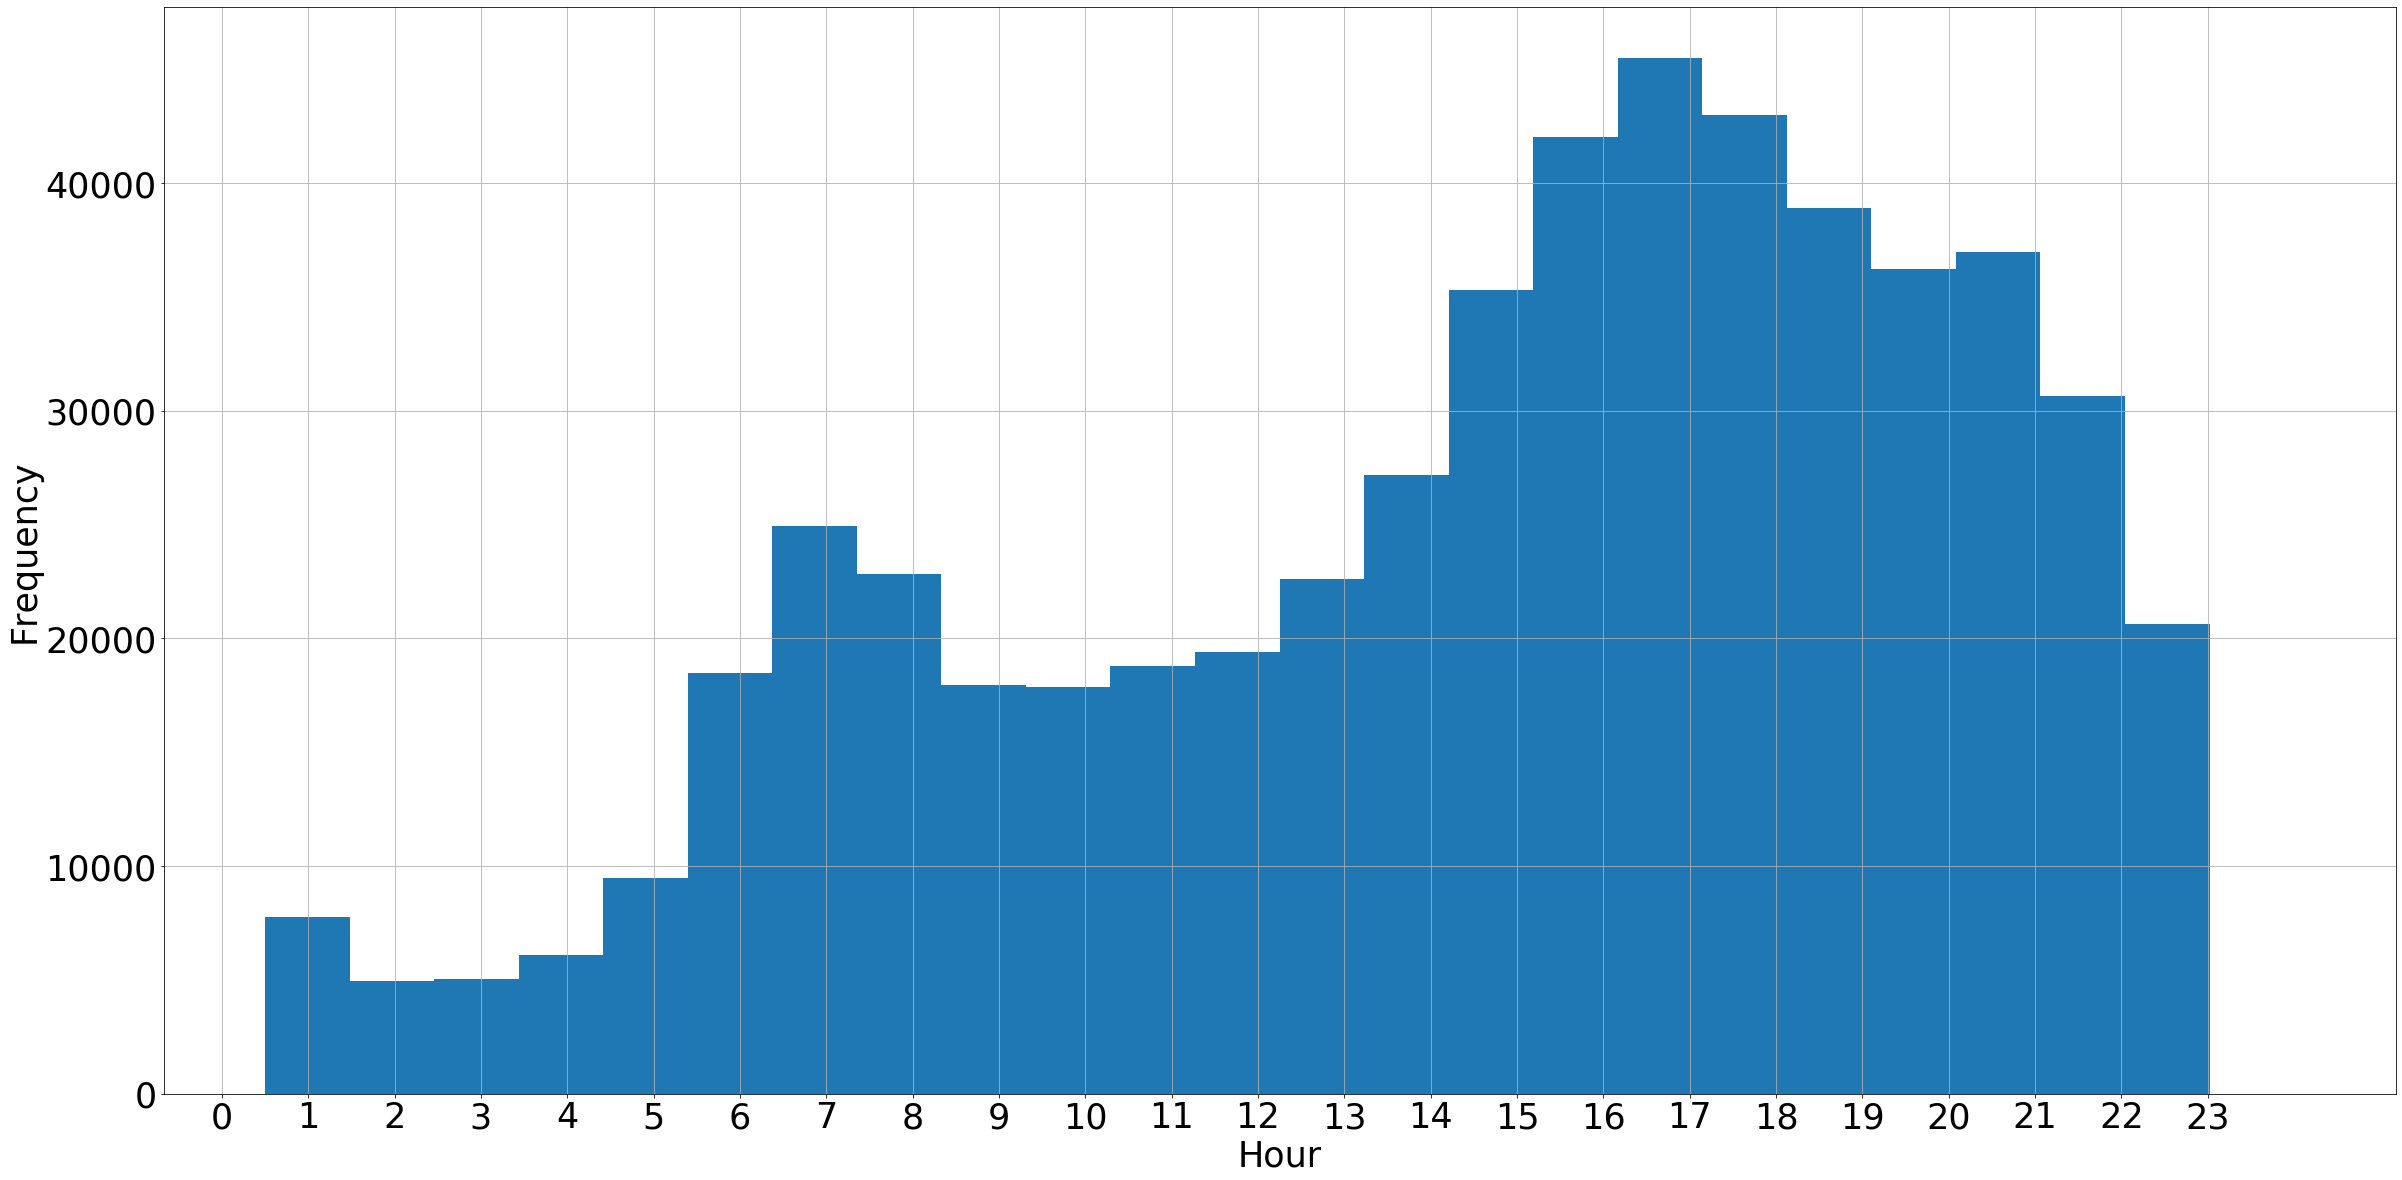

In [21]:
hour = data['Hour'].unique()
hist(data['Hour'] , bins=24, range=(0.5, 24))
xlabel('Hour')
ylabel('Frequency')
xticks(hour)
yticks()
plt.grid(True)
plt.show()

#### In the frequency analysis for hours of the day above we can see that the peak hours are from 3pm to 10pm
<p>The prices for uber ride can be hiked during this time to generate more revenue and the routes of the drivers can be optimized to reach frequently visited areas quickly.</p>

#### Analyze the weekday

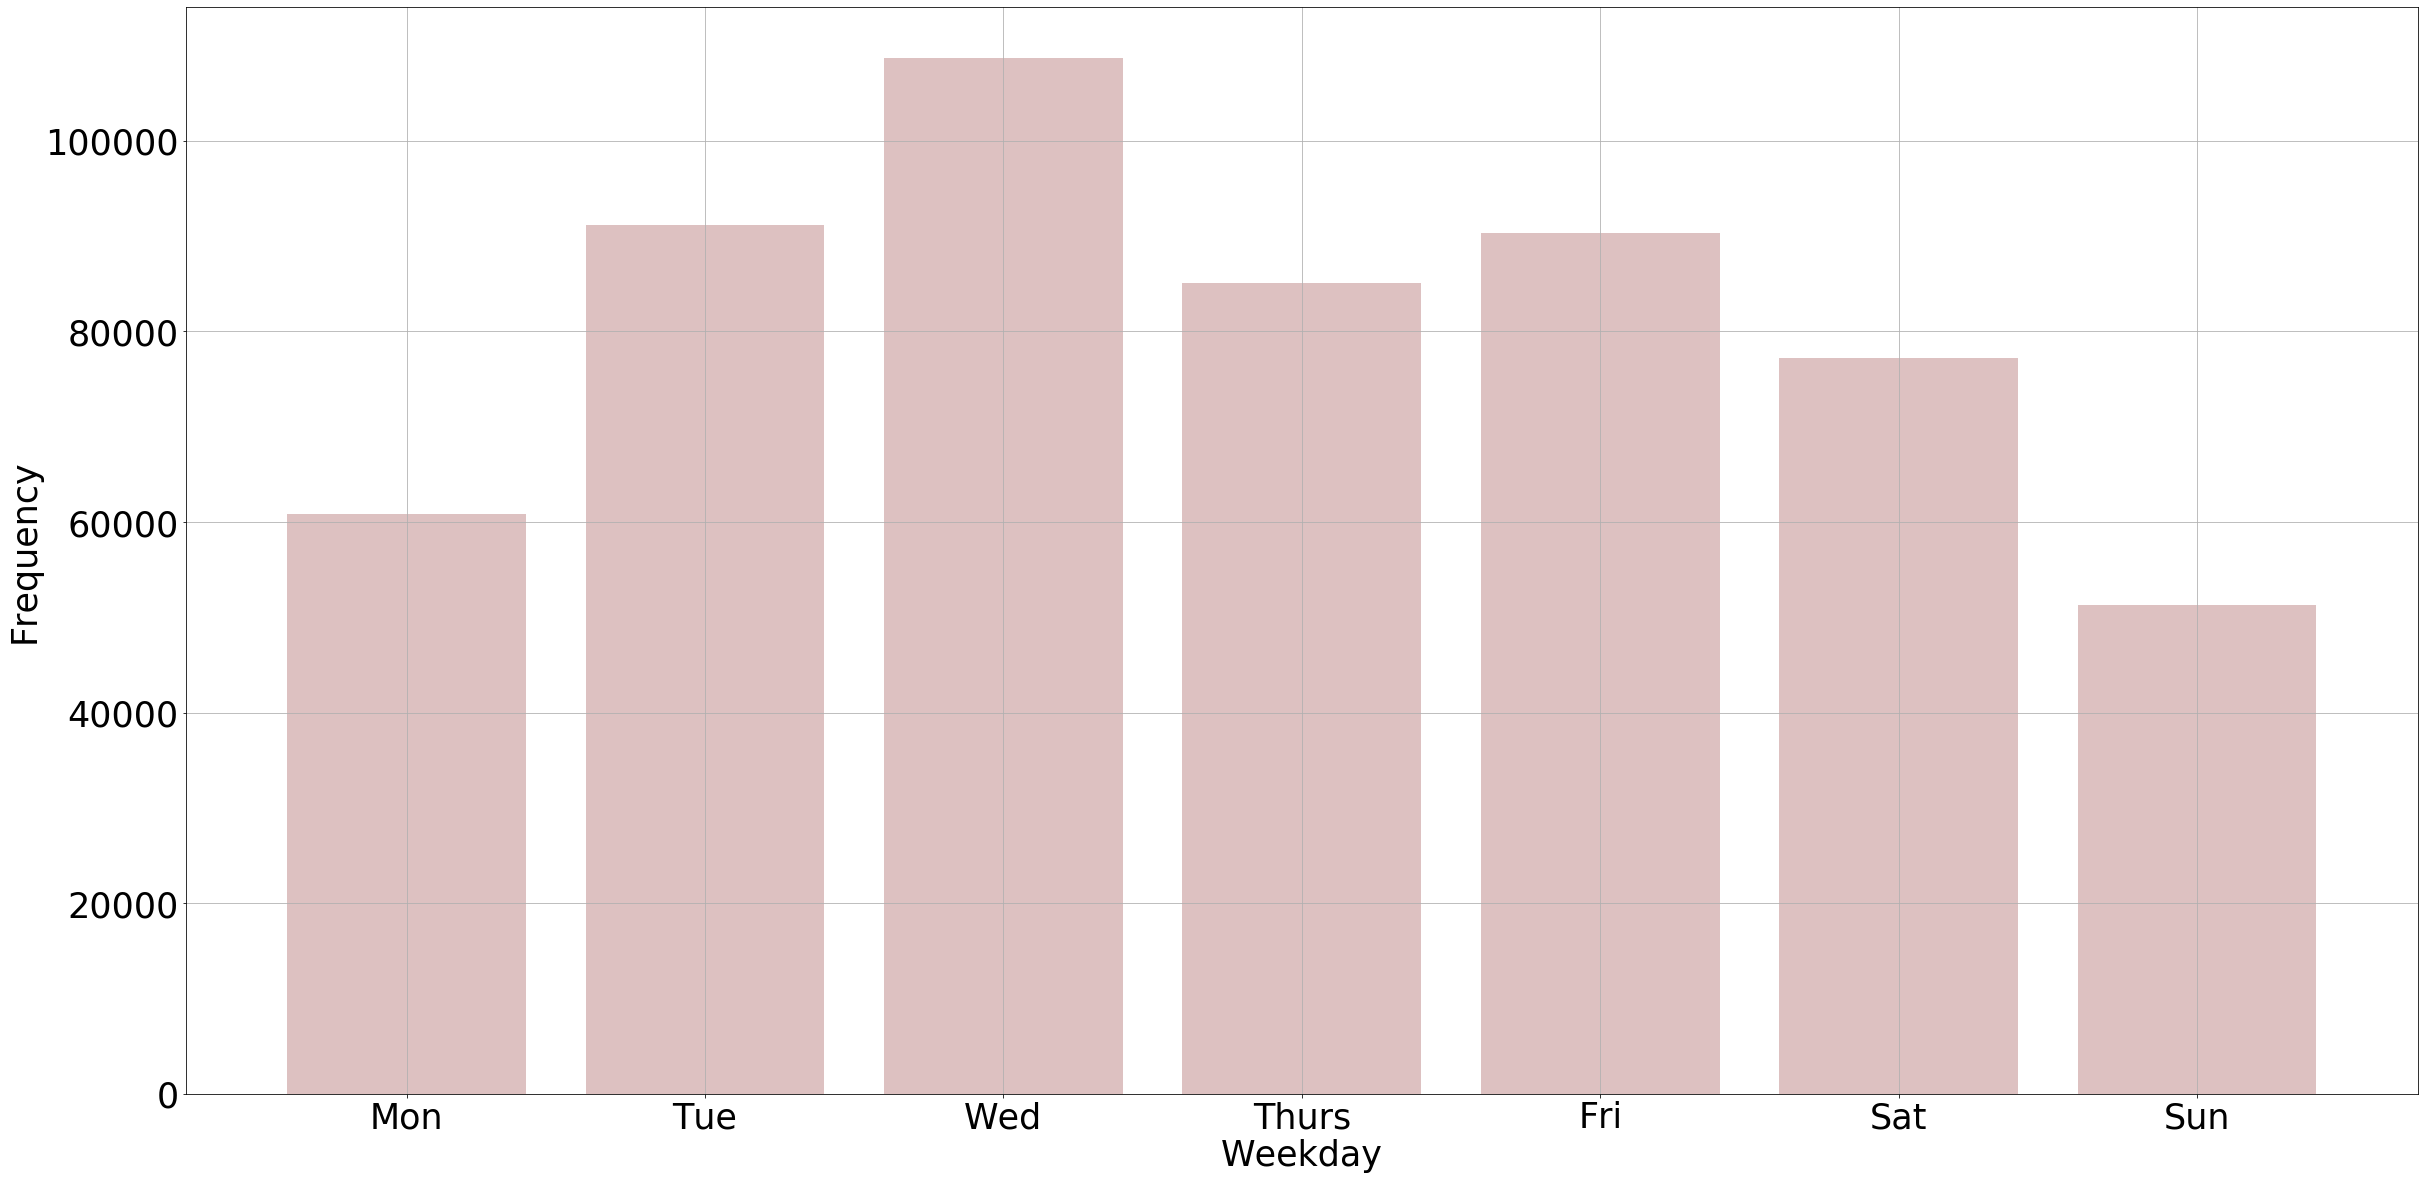

In [22]:
weekday = data['Weekday'].unique()
hist(data['Weekday'] , bins=7, range=(-0.5, 6.5), rwidth=0.8, color='#AA6666', alpha=0.4)
xlabel('Weekday')
ylabel('Frequency')
xticks(range(7), 'Mon Tue Wed Thurs Fri Sat Sun'.split(' ') , fontsize=35)
yticks(fontsize=35)
plt.grid(True)
plt.show()

#### The demand for Uber Ride is highest on wednesdays and lowest on sundays. The reason could be that wednesday is the middle of the week and hence more busy than usual and since sunday is a holiday, less number of people step out of their homes.

### Cross Analysis (Hours, DoW)

In [23]:
by_cross = data.groupby('Weekday Hour'.split()).apply(count_rows).unstack()

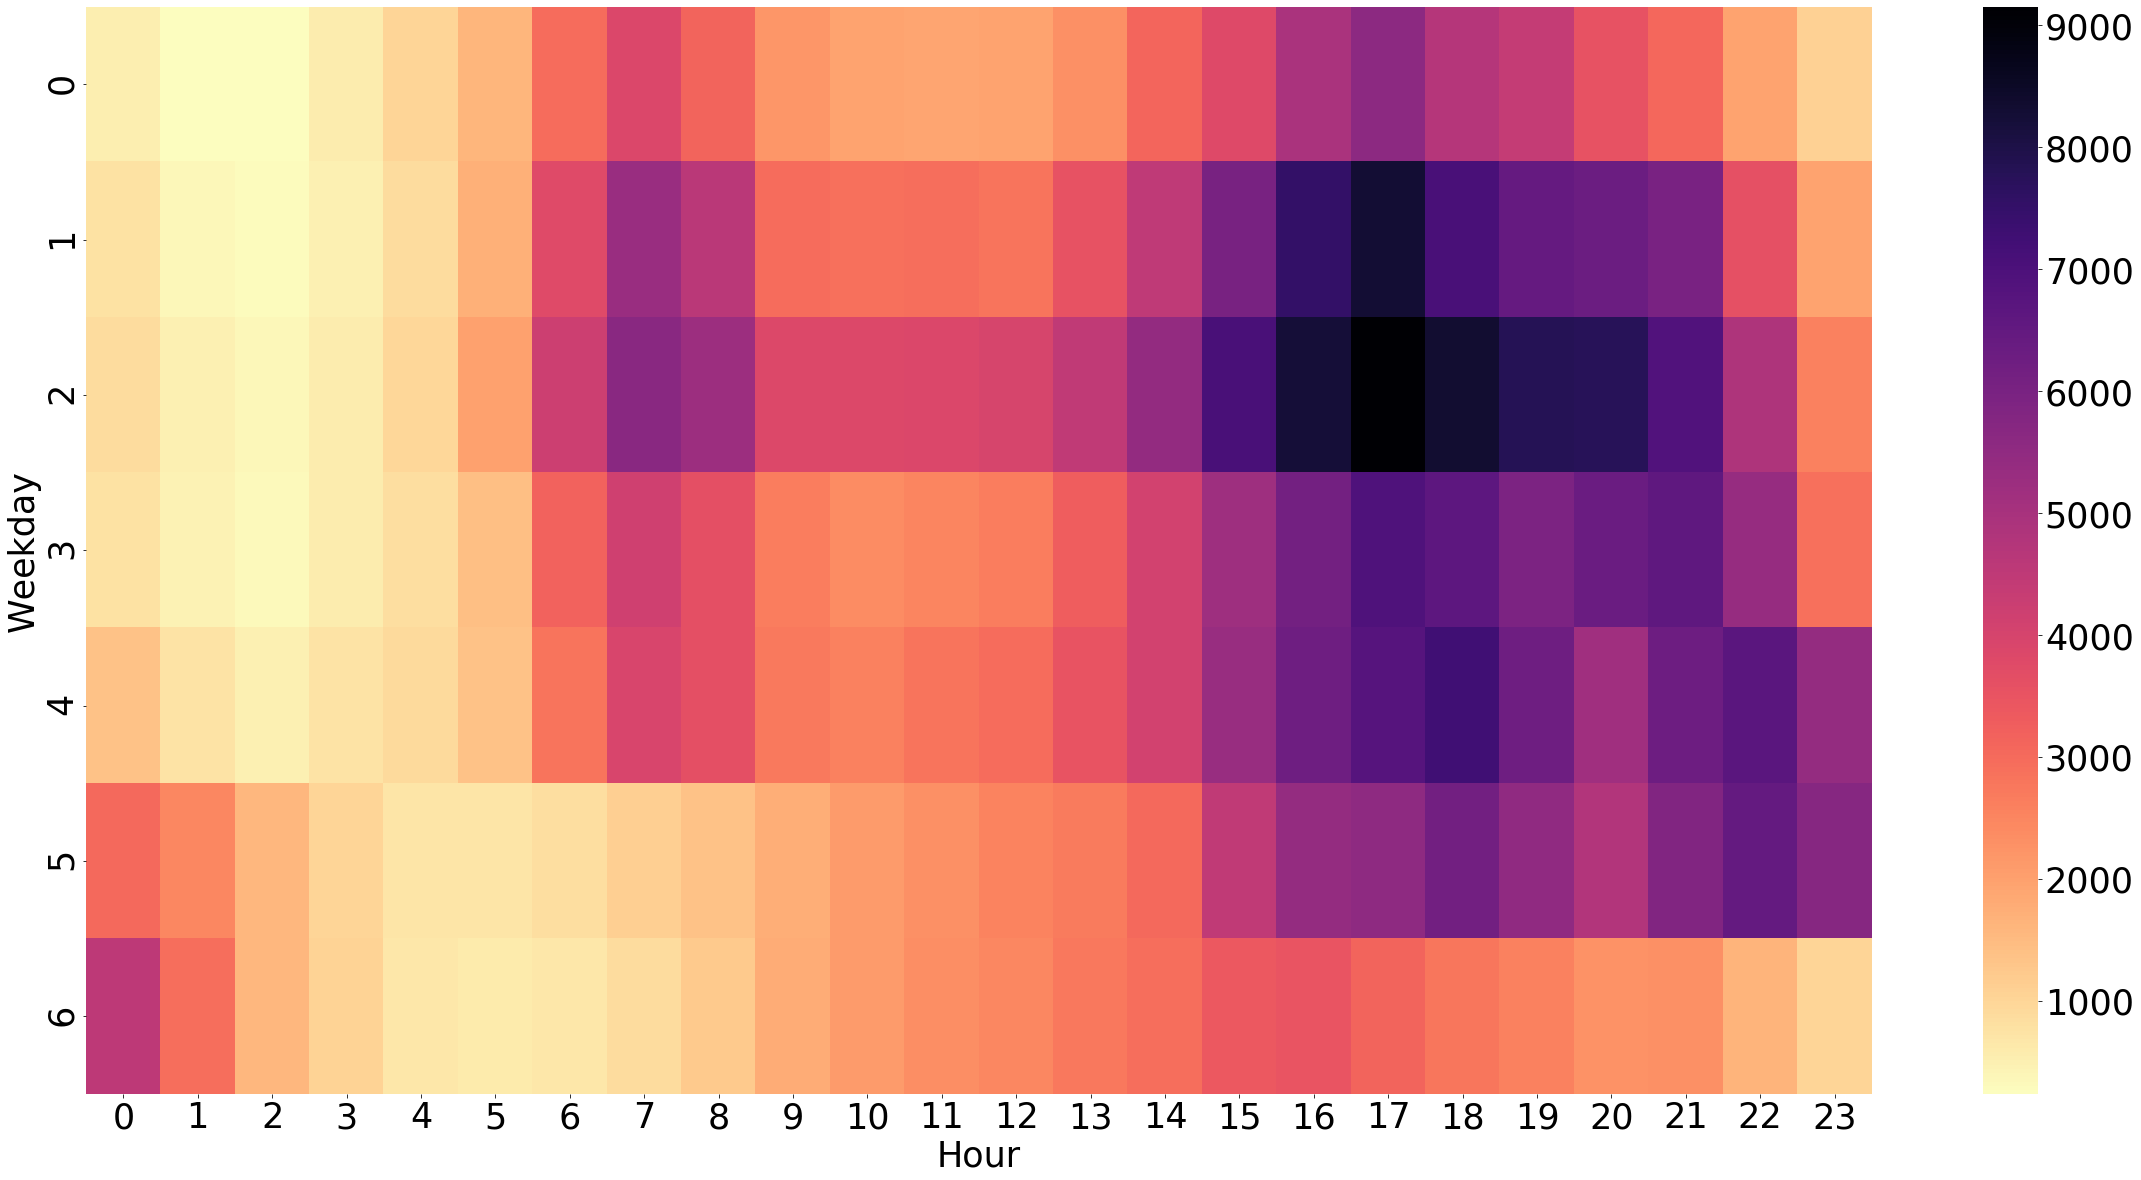

In [24]:
seaborn.heatmap(by_cross, cmap='magma_r')

#### The heat map shows the hours and weekdays on which the booking frequency is high and low. The dark areas represent the high frequency time and light areas show the low frequency time.
<p>From the heatmap we can observe that:</p>
<ul><li>During weekdays from 12am to 5am and on weekends from 2am to 8am, the booking frequency is the lowest. <strong>Reason</strong>: On weekdays people are usually asleep as they have to wake up for work next day and on weekends people go to bed late and wake up late contributing to lower number of bookings.</li>
    <li>We can see a spike in bookings on friday and saturday from 6pm to 1am(the next day). <strong> Reason</strong>: People usually got partying on the weekends hence staying out late and getting home late.</li>
    <li>Wednesday is usually the busiest day of the week leading to most no of bookings especially from 4pm to 8pm having the highest frequemcy.</li>
</ul>

#### Analysis by Latitude and Longitude

''

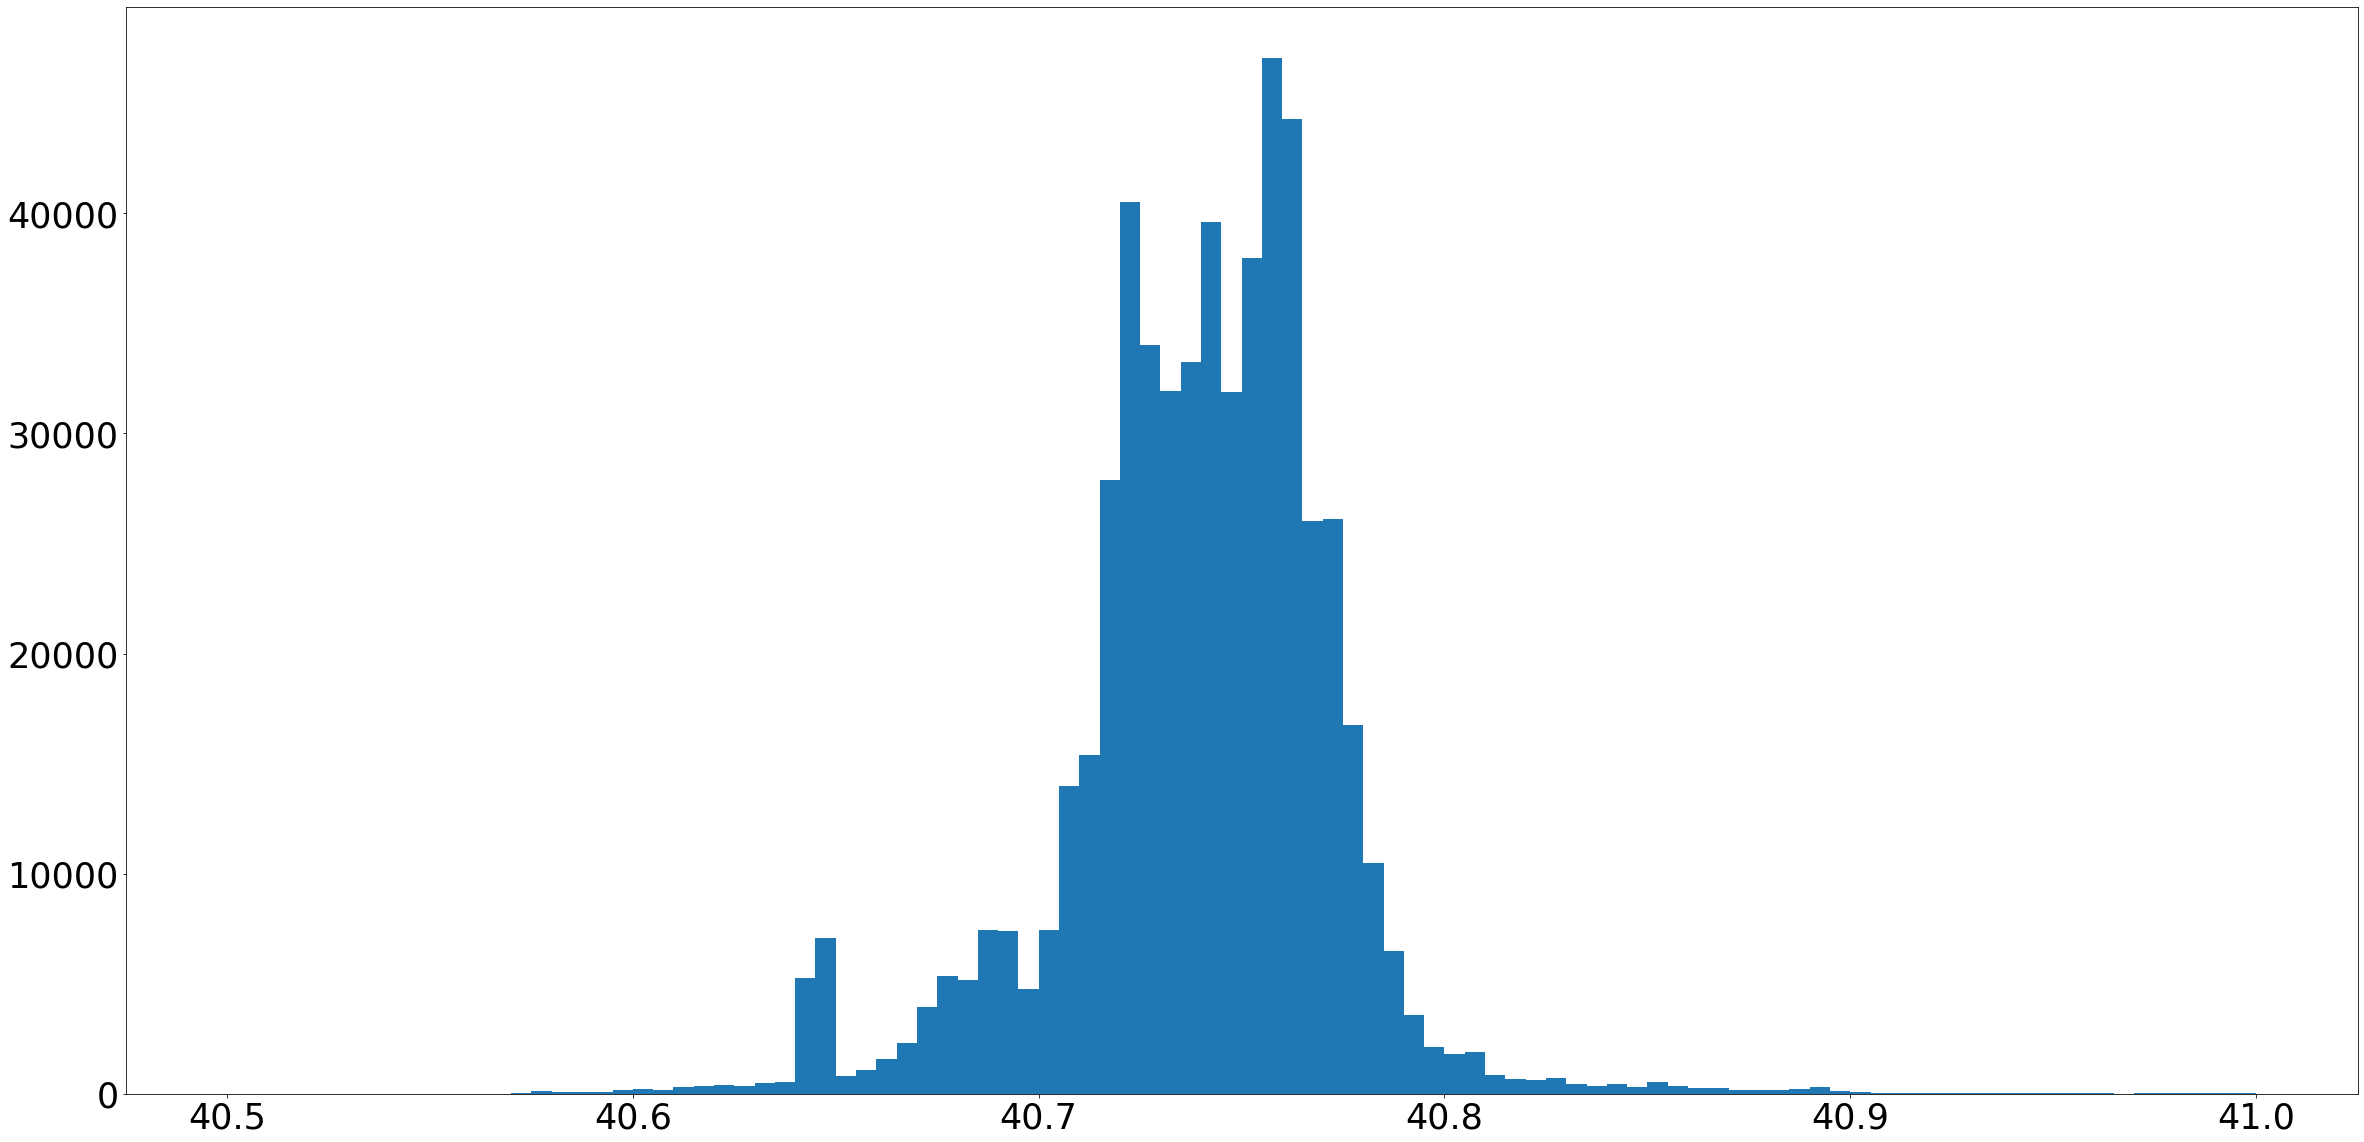

In [25]:
hist(data['Lat'], bins = 100, range=(40.5, 41))
;

''

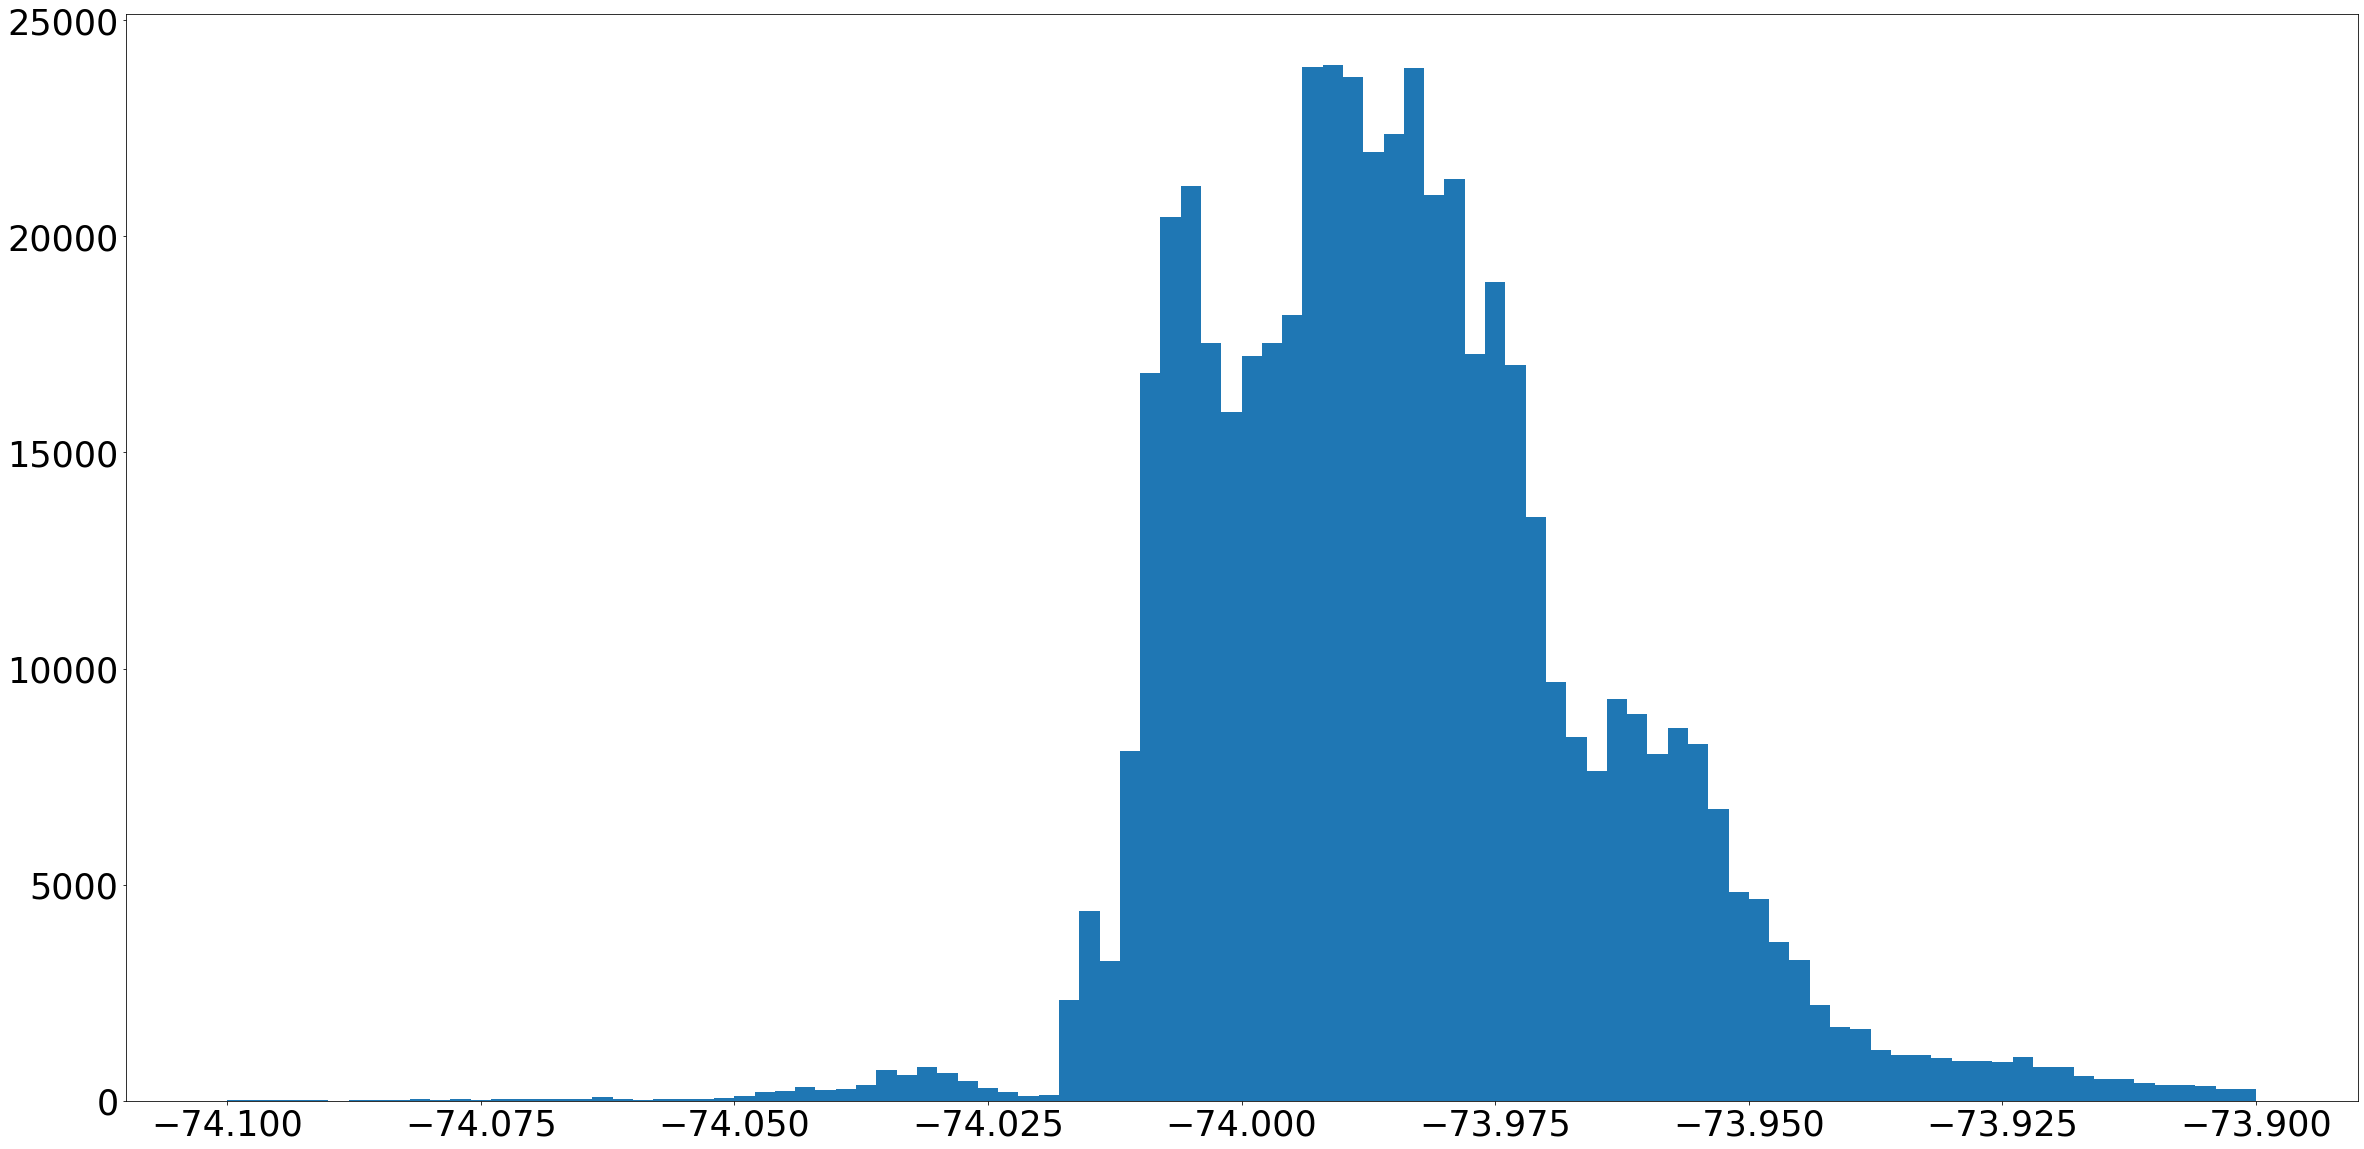

In [26]:
hist(data['Lon'], bins = 100, range=(-74.1, -73.9))
;

''

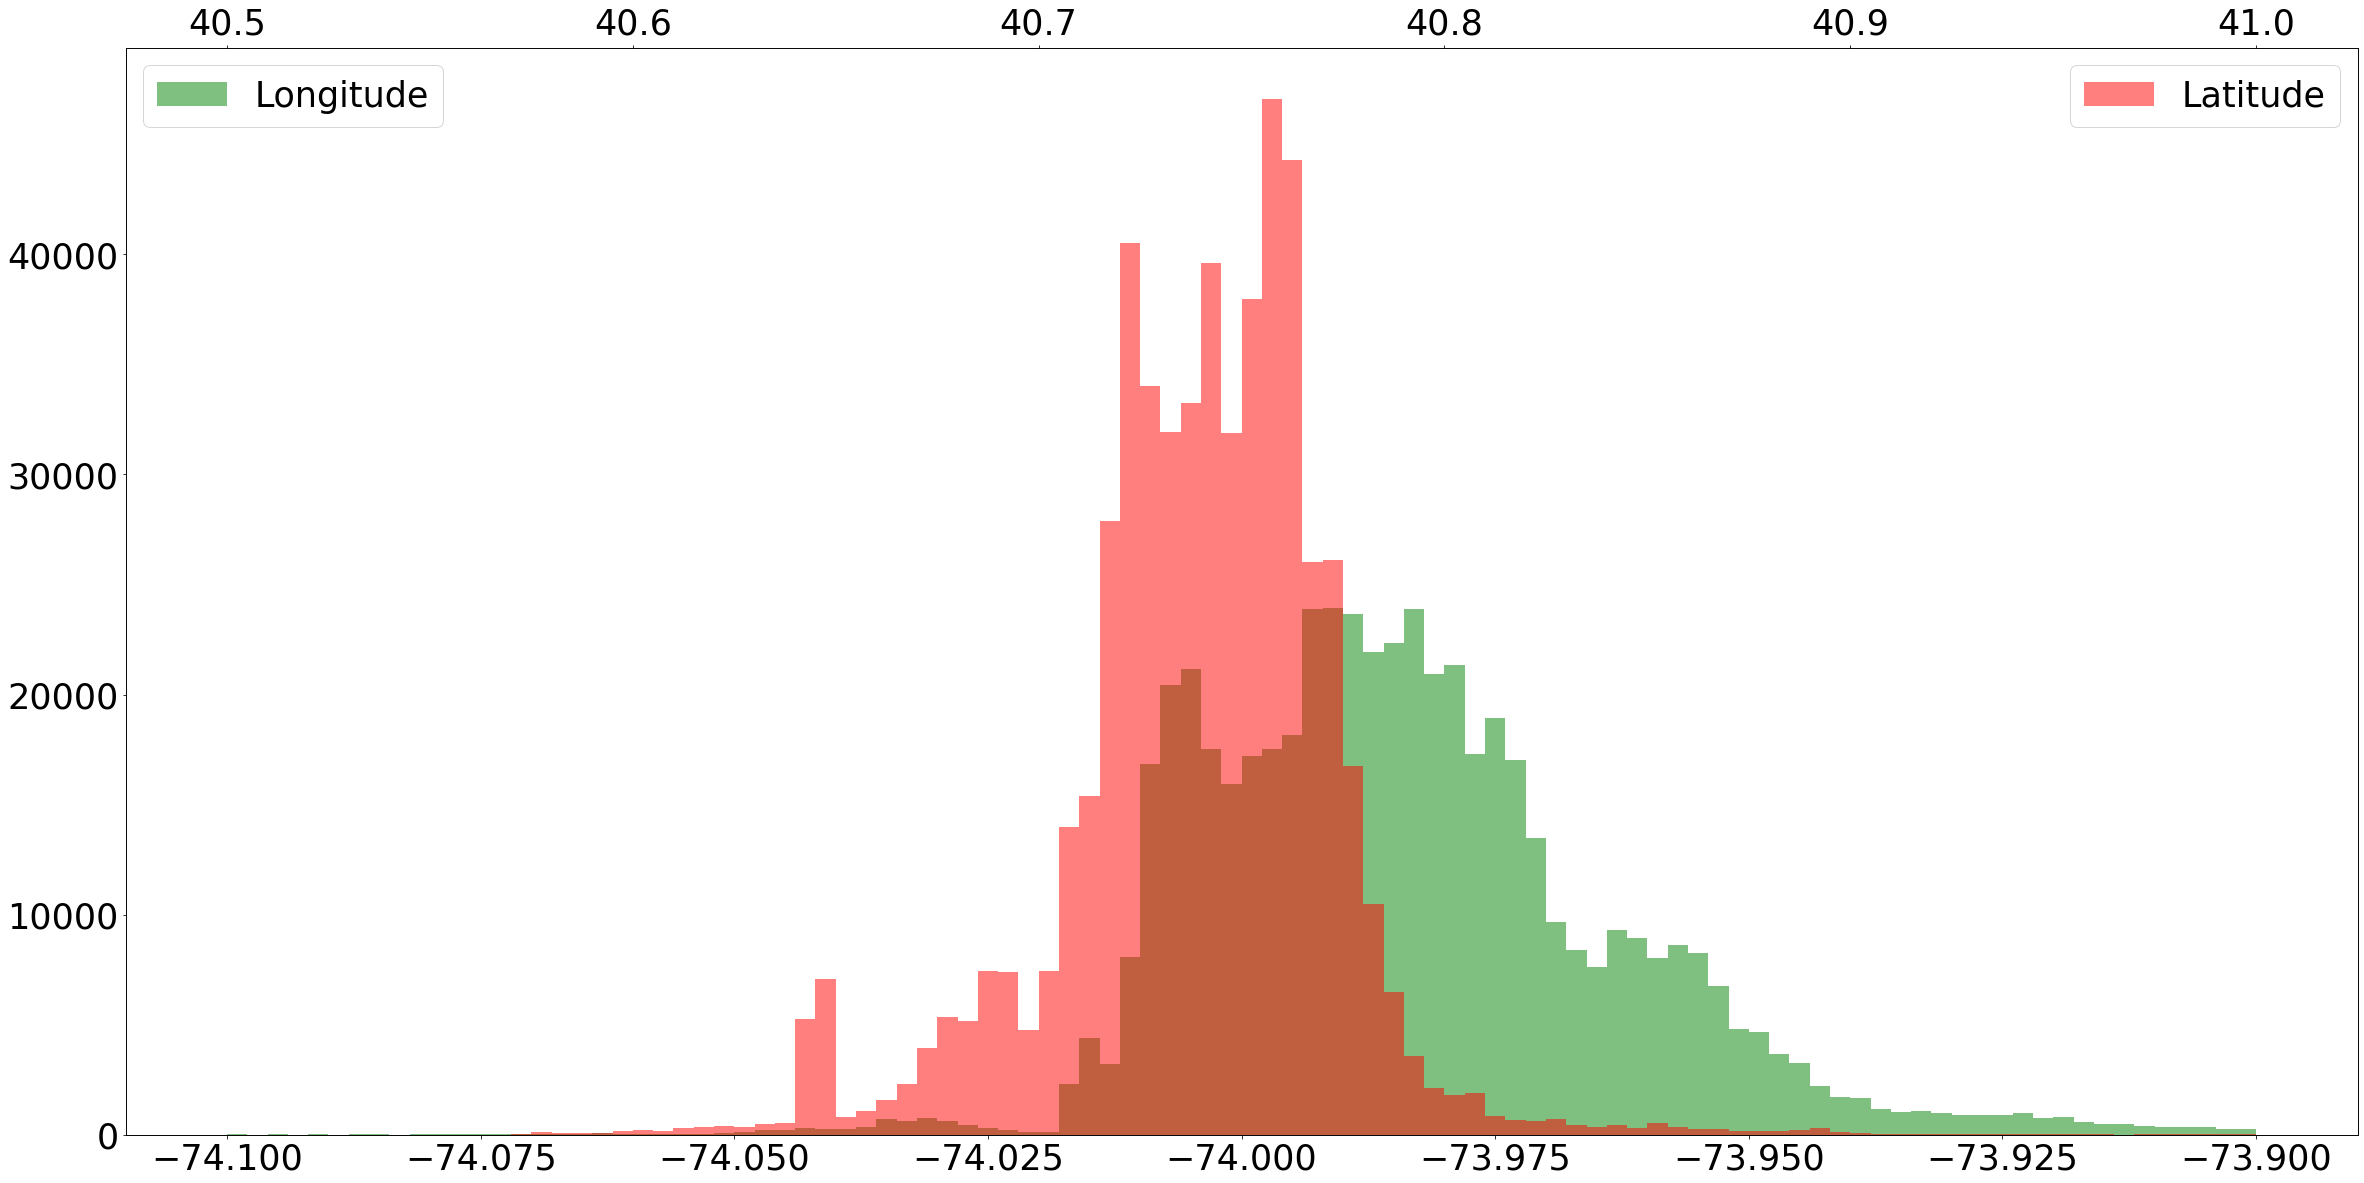

In [27]:
hist(data['Lon'], bins = 100, range=(-74.1, -73.9), color='g', alpha=0.5, label='Longitude')
legend(loc='upper left')
twiny()
hist(data['Lat'], bins = 100, range=(40.5, 41), color='r', alpha=0.5, label='Latitude')
legend(loc='best')
;

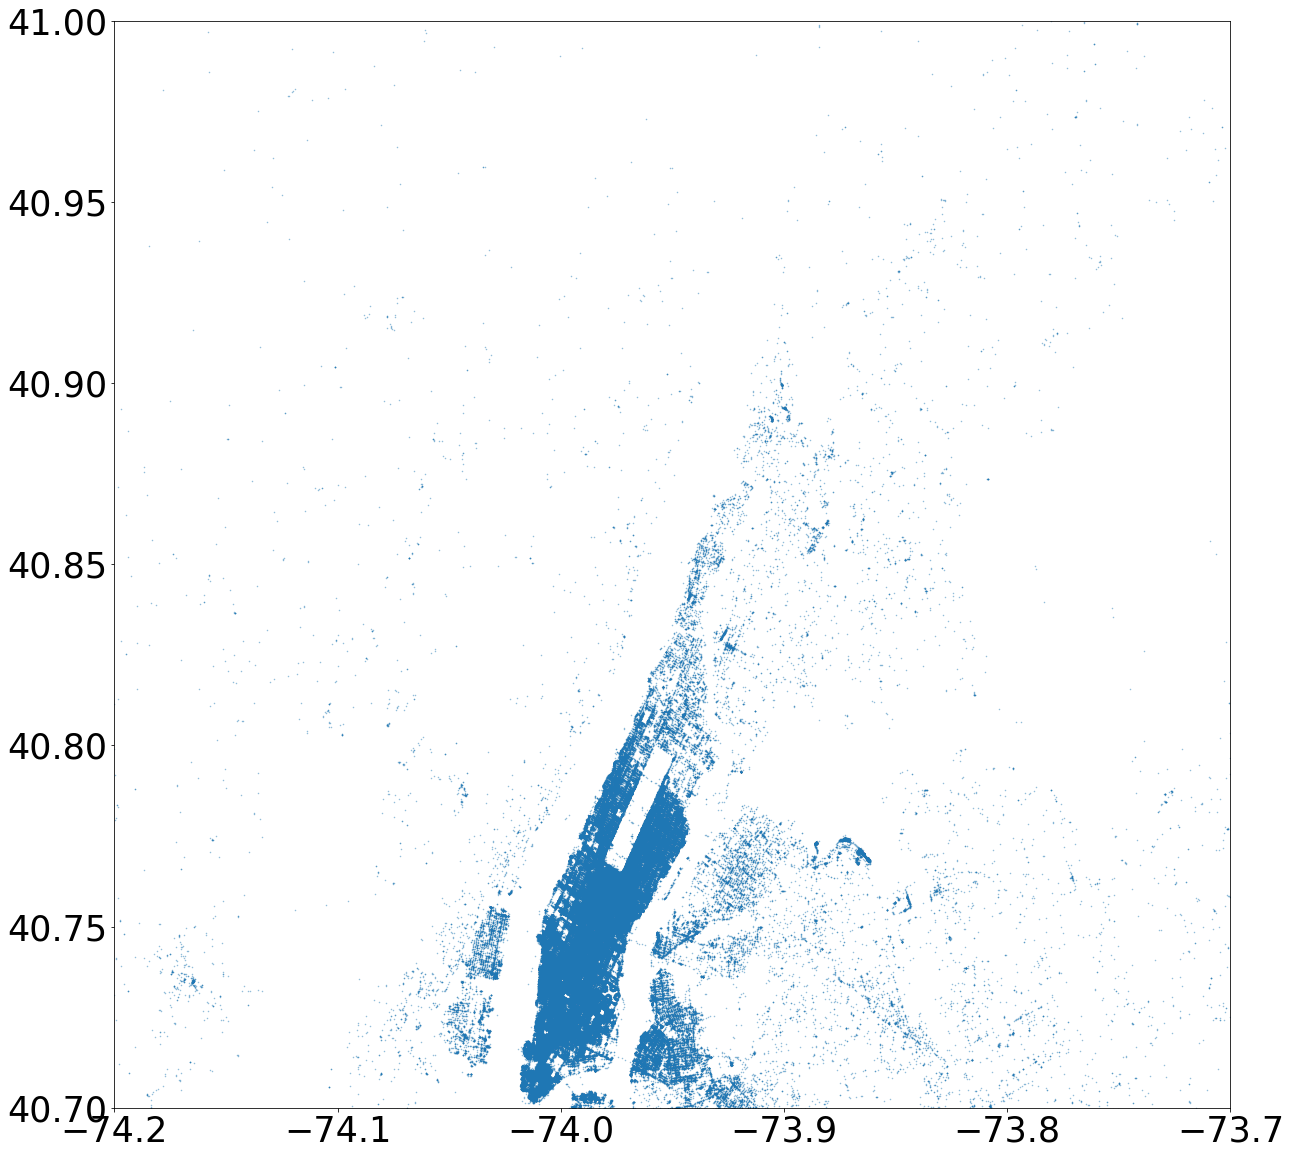

In [28]:
figure(figsize=(20,20))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=0.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)
plt.show()

#### By plotting the latitude and longitude we can see a map of manhattan and which areas are most visited by people. Te area around the central park looks most dense and hence is most cisited accordint o the uber data